In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [4]:
temp_z0_1_mod = xr.open_dataset(input_path + 'temp_z0_1_mod.nc').temp_z0_1_mod
print(temp_z0_1_mod)
temp_z0_1_slope_mod = xr.open_dataset(input_path + 'temp_z0_1_slope_mod.nc').temp_z0_1_slope_mod*10
print(temp_z0_1_slope_mod)
temp_z0_1_p_value_mod = xr.open_dataset(input_path + 'temp_z0_1_p_value_mod.nc').temp_z0_1_p_value_mod
print(temp_z0_1_p_value_mod)
temp_z0_1_std_err_mod = xr.open_dataset(input_path + 'temp_z0_1_std_err_mod.nc').temp_z0_1_std_err_mod*10
print(temp_z0_1_std_err_mod)

temp_z0_025_mod = xr.open_dataset(input_path + 'temp_z0_025_mod.nc').temp_z0_025_mod
print(temp_z0_025_mod)
temp_z0_025_slope_mod = xr.open_dataset(input_path + 'temp_z0_025_slope_mod.nc').temp_z0_025_slope_mod*10
print(temp_z0_025_slope_mod)
temp_z0_025_p_value_mod = xr.open_dataset(input_path + 'temp_z0_025_p_value_mod.nc').temp_z0_025_p_value_mod
print(temp_z0_025_p_value_mod)
temp_z0_025_std_err_mod = xr.open_dataset(input_path + 'temp_z0_025_std_err_mod.nc').temp_z0_025_std_err_mod*10
print(temp_z0_025_std_err_mod)

temp_z0_01_mod = xr.open_dataset(input_path + 'temp_z0_01_mod.nc').temp_z0_01_mod
print(temp_z0_01_mod)
temp_z0_01_slope_mod = xr.open_dataset(input_path + 'temp_z0_01_slope_mod.nc').temp_z0_01_slope_mod*10
print(temp_z0_01_slope_mod)
temp_z0_01_p_value_mod = xr.open_dataset(input_path + 'temp_z0_01_p_value_mod.nc').temp_z0_01_p_value_mod
print(temp_z0_01_p_value_mod)
temp_z0_01_std_err_mod = xr.open_dataset(input_path + 'temp_z0_01_std_err_mod.nc').temp_z0_01_std_err_mod*10
print(temp_z0_01_std_err_mod)

<xarray.DataArray 'temp_z0_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 25)>
[360000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... 17.85 18.59 19.36
  * xt_ocean  (xt_ocean) float64 90.5 91.5 92.5 93.5 ... 176.5 177.5 178.5 179.5
  * year      (year) int64 2233 2234 2235 2236 2237 ... 2253 2254 2255 2256 2257
<xarray.DataArray 'temp_z0_1_slope_mod' (yt_ocean: 160, xt_ocean: 90)>
array([[        nan,         nan,         nan, ..., -0.03557293,
        -0.03588374, -0.0344797 ],
       [        nan,         nan,         nan, ..., -0.05250549,
        -0.05363535, -0.0514963 ],
       [        nan,         nan,         nan, ..., -0.06858168,
        -0.06858708, -0.06631517],
       ...,
       [ 0.12174307,  0.13382756,  0.1488293 , ...,  0.17639724,
         0.16866103,  0.16024898],
       [ 0.12875789,  0.14295279,  0.15553025, ...,  0.18640512,
         0.17866892,  0.16959651],
       [ 0.1484868 ,  0.1601971 ,  0.1616279 , ...,  0.2

In [5]:
temp_z0_oisst = xr.open_dataset(input_path + 'temp_z0_oisst.nc').temp_z0_oisst
print(temp_z0_oisst)
temp_z0_slope_oisst = xr.open_dataset(input_path + 'temp_z0_slope_oisst.nc').temp_z0_slope_oisst*10
print(temp_z0_slope_oisst)
temp_z0_p_value_oisst = xr.open_dataset(input_path + 'temp_z0_p_value_oisst.nc').temp_z0_p_value_oisst
print(temp_z0_p_value_oisst)
temp_z0_std_err_oisst = xr.open_dataset(input_path + 'temp_z0_std_err_oisst.nc').temp_z0_std_err_oisst*10
print(temp_z0_std_err_oisst)

<xarray.DataArray 'temp_z0_oisst' (lat: 94, lon: 94, year: 25)>
[220900 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -71.5 -70.5 -69.5 -68.5 -67.5 ... 18.5 19.5 20.5 21.5
  * lon      (lon) float32 -271.5 -270.5 -269.5 -268.5 ... -180.5 -179.5 -178.5
  * year     (year) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_z0_slope_oisst' (lat: 94, lon: 94)>
array([[        nan,         nan,         nan, ..., -0.02417305,
        -0.0322372 , -0.03262824],
       [        nan,         nan,         nan, ..., -0.04444868,
        -0.0561474 , -0.05914102],
       [        nan,         nan,         nan, ..., -0.05961539,
        -0.07229488, -0.07749358],
       ...,
       [ 0.08760941,  0.10363444,  0.11420518, ...,  0.22317926,
         0.20954427,  0.20889692],
       [ 0.04671782,  0.06403819,  0.06869808, ...,  0.20775582,
         0.19218597,  0.19399991],
       [-0.00126963,  0.00919222, -0.00710258, ...,  0.19156344,
         0

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


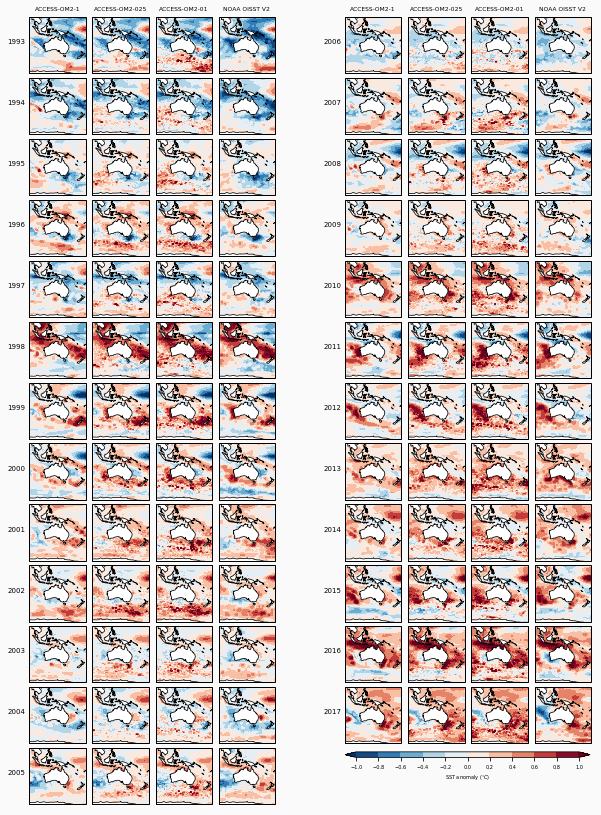

In [8]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

fig = plt.figure(1, figsize=(10,15.5), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 5})   

row=14
col=9

year = np.arange(1993,2018)

# ax = plt.subplot2grid((row, col), (0,0), colspan=9)
# pos = ax.get_position()
# pos_plot = [pos.x0, pos.y0+0.03, pos.x1+0.01, pos.y1+0.05]
# plt.plot(year, temp_z0_1_mod.\
#          sel(xt_ocean=slice(90,180)).sel(yt_ocean=slice(-70,20)).\
#          mean('xt_ocean').mean('yt_ocean'))
# plt.plot(year, temp_z0_025_mod.\
#          sel(xt_ocean=slice(90,180)).sel(yt_ocean=slice(-70,20)).\
#          mean('xt_ocean').mean('yt_ocean'))
# plt.plot(year, temp_z0_01_mod.\
#          sel(xt_ocean=slice(90,180)).sel(yt_ocean=slice(-70,20)).\
#          mean('xt_ocean').mean('yt_ocean'))
# plt.plot(year, temp_z0_oisst.\
#          sel(lon=slice(90-360,180-360)).sel(lat=slice(-70,20)).\
#          mean('lon').mean('lat'))
# ax.set_position(bbox(pos_plot))
# ax.set_title('SST regional average')
# ax.set_xlim([year[0], year[-1]])
# ax.set_xlabel('Year')
# ax.set_xticks(year[::2])
# plt.legend([1,2,3,4])

p = 0
f = 0
for i,y in enumerate(year):
    print(y)
    
    if y == 2006:
        p = 5
        f = -13

    ax = plt.subplot2grid((row, col), (i+1+f,p+0), projection=ccrs.PlateCarree())
    pos = ax.get_position()
    pos_plot = [pos.x0, pos.y0, pos.x1+0.01, pos.y1+0.005]
    levels=arange(-1,1,0.2)
    cmap = plt.cm.RdBu_r
    data = temp_z0_1_mod.sel(year=y+240) - temp_z0_1_mod.mean('year')
    plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
                cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
    ax.set_position(bbox(pos_plot))
    if i == 0 or y == 2006:
        ax.set_title('ACCESS-OM2-1')
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_yticks([50], crs=ccrs.PlateCarree())
    ax.set_ylabel(y, fontsize=7, rotation=0, ha='right')
    ax.set_yticklabels('')
    ax.add_feature(land_50m)
    if y == 2017:
        axins = inset_axes(ax,
                           width="435%",  # width = 5% of parent_bbox width
                           height="10%",  # height : 50%
                           loc='lower left',
                           bbox_to_anchor=(0, -0.25, 1, 1),
                           bbox_transform=ax.transAxes,
                           borderpad=0)
        cbar = plt.colorbar(plot, orientation='horizontal',
                            label=r'SST anomaly ($^{\circ}C$)', cax=axins, ticks=levels)

    ax = plt.subplot2grid((row, col), (i+1+f,p+1), projection=ccrs.PlateCarree())
    pos = ax.get_position()
    pos_plot = [pos.x0, pos.y0, pos.x1+0.01, pos.y1+0.005]
    # levels=arange(0,30,2)
    # cmap = plt.cm.Spectral
    data = temp_z0_025_mod.sel(year=y+240) - temp_z0_025_mod.mean('year')
    plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
                cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
    ax.set_position(bbox(pos_plot))
    if i == 0 or y == 2006:
        ax.set_title('ACCESS-OM2-025')
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.add_feature(land_50m)

    ax = plt.subplot2grid((row, col), (i+1+f,p+2), projection=ccrs.PlateCarree())
    pos = ax.get_position()
    pos_plot = [pos.x0, pos.y0, pos.x1+0.01, pos.y1+0.005]
    # levels=arange(0,30,2)
    # cmap = plt.cm.Spectral
    data = temp_z0_01_mod.sel(year=y+240) - temp_z0_01_mod.mean('year')
    plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
                cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
    ax.set_position(bbox(pos_plot))
    if i == 0 or y == 2006:
        ax.set_title('ACCESS-OM2-01')
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.add_feature(land_50m)

    ax = plt.subplot2grid((row, col), (i+1+f,p+3), projection=ccrs.PlateCarree())
    pos = ax.get_position()
    pos_plot = [pos.x0, pos.y0, pos.x1+0.01, pos.y1+0.005]
#     levels=arange(0,30,2)
#     cmap = plt.cm.Spectral
    data = temp_z0_oisst.sel(year=y) - temp_z0_oisst.mean('year')
    plot = plt.contourf(data.lon, data.lat, data,
                cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
    ax.set_position(bbox(pos_plot))
    if i == 0 or y == 2006:
        ax.set_title('NOAA OISST V2')
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.add_feature(land_50m)
    

savefigure('annual_means')

1993
1994
1995


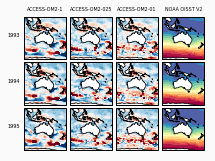

In [148]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

fig = plt.figure(1, figsize=(3,16), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 4})   

row=25
col=4

year = np.arange(1993,2018)
for i,y in enumerate(year[0:3]):
    print(y)

    ax = plt.subplot2grid((row, col), (i,0), projection=ccrs.PlateCarree())
    pos = ax.get_position()
    pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
    levels=arange(-2,2,0.2)
    cmap = plt.cm.RdBu_r
    data = temp_z0_1_mod.sel(year=y+240).interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
    - temp_z0_oisst.sel(year=y)
    plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
                cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
    ax.set_position(bbox(pos_plot))
    if i == 0:
        ax.set_title('ACCESS-OM2-1')
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_yticks([50], crs=ccrs.PlateCarree())
    ax.set_ylabel(y, fontsize=5, rotation=0, ha='right')
    ax.set_yticklabels('')
    ax.add_feature(land_50m)

    ax = plt.subplot2grid((row, col), (i,1), projection=ccrs.PlateCarree())
    pos = ax.get_position()
    pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
    # levels=arange(0,30,2)
    # cmap = plt.cm.Spectral
    data = temp_z0_025_mod.sel(year=y+240).interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
    - temp_z0_oisst.sel(year=y)
    plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
                cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
    ax.set_position(bbox(pos_plot))
    if i == 0:
        ax.set_title('ACCESS-OM2-025')
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.add_feature(land_50m)

    ax = plt.subplot2grid((row, col), (i,2), projection=ccrs.PlateCarree())
    pos = ax.get_position()
    pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
    # levels=arange(0,30,2)
    # cmap = plt.cm.Spectral
    data = temp_z0_01_mod.sel(year=y+240).interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
    - temp_z0_oisst.sel(year=y)
    plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
                cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
    ax.set_position(bbox(pos_plot))
    if i == 0:
        ax.set_title('ACCESS-OM2-01')
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.add_feature(land_50m)

    # axins = inset_axes(ax,
    #                    width="5%",  # width = 5% of parent_bbox width
    #                    height="100%",  # height : 50%
    #                    loc='lower left',
    #                    bbox_to_anchor=(1.075, 0, 1, 1),
    #                    bbox_transform=ax.transAxes,
    #                    borderpad=0)
    # cbar = plt.colorbar(plot, orientation='vertical',
    #                     label=r'SST bias ($^{\circ}C$)', cax=axins)

    ax = plt.subplot2grid((row, col), (i,3), projection=ccrs.PlateCarree())
    pos = ax.get_position()
    pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
    levels=arange(0,30,2)
    cmap = plt.cm.Spectral
    data = temp_z0_oisst.sel(year=y)
    plot = plt.contourf(data.lon, data.lat, data,
                cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
    ax.set_position(bbox(pos_plot))
    if i == 0:
        ax.set_title('NOAA OISST V2')
    ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.add_feature(land_50m)

    # axins = inset_axes(ax,
    #                    width="5%",  # width = 5% of parent_bbox width
    #                    height="100%",  # height : 50%
    #                    loc='lower left',
    #                    bbox_to_anchor=(1.075, 0, 1, 1),
    #                    bbox_transform=ax.transAxes,
    #                    borderpad=0)
    # cbar = plt.colorbar(plot, orientation='vertical',
    #                     label=r'SST ($^{\circ}C$)', cax=axins)



plt.tight_layout(h_pad=-1, w_pad=-3.5)






# axins = inset_axes(ax,
#                    width="100%",  # width = 5% of parent_bbox width
#                    height="5%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(0, -0.125, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='horizontal',
#                     label=r'SAT ($^{\circ}C$)', cax=axins)


# ax = plt.subplot(gs1[yi,0], projection=ccrs.PlateCarree())
# levels=arange(-1,1,0.2)
# cmap = plt.cm.RdBu_r
# sst_1_bias = sst_1_mod.sel(time=y).values-sst_1_mod.mean('time').values
# plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
#              sst_1_bias, 
#              levels=levels, extend='both', 
#              cmap=cmap, transform=ccrs.PlateCarree())
# ax.set_yticks([90], crs=ccrs.PlateCarree())
# ax.set_ylabel(r"$\bf{'" + str(y)[-2:] + r"}$", rotation=0, ha='right', va='center')
# if yi == 0:
#     ax.set_title(r'$\bf{1}$')
# ax.add_feature(land_50m)
# ax = plt.subplot(gs1[yi,1], projection=ccrs.PlateCarree())
# sst_025_bias = sst_025_mod.sel(time=y).values-sst_025_mod.mean('time').values
# plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
#              sst_025_bias, 
#              levels=levels, extend='both',
#              cmap=cmap, transform=ccrs.PlateCarree())
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# if yi == 0:
#     ax.set_title(r'$\bf{025}$')
# ax.add_feature(land_50m)
# ax = plt.subplot(gs1[yi,2], projection=ccrs.PlateCarree())
# sst_01_bias = sst_01_mod.sel(year=y).values-sst_01_mod.mean('year').values
# plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
#              sst_01_bias, 
#              levels=levels, extend='both',
#              cmap=cmap, transform=ccrs.PlateCarree())
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# if yi == 0:
#     ax.set_title(r'$\bf{01}$')
# ax.add_feature(land_50m)
# ax = plt.subplot(gs1[yi,3], projection=ccrs.PlateCarree())
# plt.contourf(sst_obs.lon+360, sst_obs.lat, 
#              sst_obs.sel(year=y).values.T-sst_obs.mean('year').values.T, 
#              levels=levels, extend='both',
#              cmap=cmap, transform=ccrs.PlateCarree())
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# if yi == 0:
#     ax.set_title(r'$\bf{OBS}$')
# ax.add_feature(land_50m)
# print(y)

# ax = plt.subplot(gs3[yi+1,0:4], projection=ccrs.PlateCarree())
# ax.set_visible(False)
# plt.colorbar(orientation='horizontal', label='SST anomaly ($^{\circ}C$)')

savefigure('annual_means')